**Importing the Dependencies**

In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from keras_tuner import RandomSearch

Data Collection & Processing

In [3]:
ds=pd.read_csv("data.csv")

In [4]:
print(ds)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [5]:
ds['diagnosis'].replace(["B","M"],[0,1],inplace=True)

In [6]:
ds.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [7]:
ds.shape

(569, 33)

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
ds.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
ds.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [11]:
ds['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [12]:
ds.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
1,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN


Separating the features and target

In [13]:
X = ds.drop(['diagnosis','Unnamed: 32'], axis=1)

Y = ds['diagnosis']

In [14]:
print(np.isnan(X).sum())
print(np.isinf(X).sum())

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
id                         0
radius_mean                0
texture_mean               0
p

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(569, 31) (455, 31) (114, 31)


Standardize the data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

**Building the Neural Network**

In [19]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [20]:
!pip install scikeras

Defaulting to user installation because normal site-packages is not writeable


In [21]:
!pip install keras-tuner --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [26]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 40)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = hp.Choice('optimizer', ['adam', 'sgd'])
    learning_rate = hp.Choice('learning_rate', [0.001, 0.01, 0.1])
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
        
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [27]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project1',project_name='aps-fault')
tuner.search(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5)

INFO:tensorflow:Reloading Tuner from project1\aps-fault\tuner0.json
INFO:tensorflow:Oracle triggered exit


In [28]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Epoch 1/200
15/15 [==============================] - 3s 37ms/step - loss: 170492.5938 - accuracy: 0.5033 - val_loss: 53606.3984 - val_accuracy: 0.6053
Epoch 2/200
15/15 [==============================] - 0s 12ms/step - loss: 133739.8750 - accuracy: 0.5055 - val_loss: 115028.9375 - val_accuracy: 0.6053
Epoch 3/200
15/15 [==============================] - 0s 12ms/step - loss: 72978.3281 - accuracy: 0.5495 - val_loss: 42405.9531 - val_accuracy: 0.6053
Epoch 4/200
15/15 [==============================] - 0s 12ms/step - loss: 11124.9062 - accuracy: 0.5055 - val_loss: 17509.6582 - val_accuracy: 0.6053
Epoch 5/200
15/15 [==============================] - 0s 13ms/step - loss: 28881.6191 - accuracy: 0.5231 - val_loss: 21195.9609 - val_accuracy: 0.6053
Epoch 6/200
15/15 [==============================] - 0s 12ms/step - loss: 13914.1045 - accuracy: 0.5253 - val_loss: 28262.7012 - val_accuracy: 0.3947
Epoch 7/200
15/15 [==============================] - 0s 12ms/step - loss: 17066.3887 - accuracy: 

15/15 [==============================] - 0s 12ms/step - loss: 58.8530 - accuracy: 0.5451 - val_loss: 124.7045 - val_accuracy: 0.3860
Epoch 57/200
15/15 [==============================] - 0s 12ms/step - loss: 194.7693 - accuracy: 0.4901 - val_loss: 89.0054 - val_accuracy: 0.3860
Epoch 58/200
15/15 [==============================] - 0s 12ms/step - loss: 52.6129 - accuracy: 0.4857 - val_loss: 34.3132 - val_accuracy: 0.6053
Epoch 59/200
15/15 [==============================] - 0s 12ms/step - loss: 25.6233 - accuracy: 0.5604 - val_loss: 112.4009 - val_accuracy: 0.3947
Epoch 60/200
15/15 [==============================] - 0s 12ms/step - loss: 95.8940 - accuracy: 0.5231 - val_loss: 54.4314 - val_accuracy: 0.4298
Epoch 61/200
15/15 [==============================] - 0s 12ms/step - loss: 22.4595 - accuracy: 0.5648 - val_loss: 0.8897 - val_accuracy: 0.6053
Epoch 62/200
15/15 [==============================] - 0s 12ms/step - loss: 0.6611 - accuracy: 0.6330 - val_loss: 0.8839 - val_accuracy: 0.605

15/15 [==============================] - 0s 12ms/step - loss: 0.6533 - accuracy: 0.6352 - val_loss: 0.9909 - val_accuracy: 0.6140
Epoch 114/200
15/15 [==============================] - 0s 12ms/step - loss: 0.6533 - accuracy: 0.6352 - val_loss: 0.9903 - val_accuracy: 0.6140
Epoch 115/200
15/15 [==============================] - 0s 12ms/step - loss: 0.6530 - accuracy: 0.6352 - val_loss: 0.9842 - val_accuracy: 0.6140
Epoch 116/200
15/15 [==============================] - 0s 12ms/step - loss: 0.6533 - accuracy: 0.6352 - val_loss: 0.9860 - val_accuracy: 0.6140
Epoch 117/200
15/15 [==============================] - 0s 12ms/step - loss: 0.6531 - accuracy: 0.6352 - val_loss: 0.9812 - val_accuracy: 0.6140
Epoch 118/200
15/15 [==============================] - 0s 12ms/step - loss: 0.6535 - accuracy: 0.6352 - val_loss: 0.9778 - val_accuracy: 0.6140
Epoch 119/200
15/15 [==============================] - 0s 12ms/step - loss: 0.6532 - accuracy: 0.6352 - val_loss: 0.9843 - val_accuracy: 0.6140
Epoch 

Epoch 170/200
15/15 [==============================] - 0s 12ms/step - loss: 0.6532 - accuracy: 0.6352 - val_loss: 1.0122 - val_accuracy: 0.6140
Epoch 171/200
15/15 [==============================] - 0s 13ms/step - loss: 0.6532 - accuracy: 0.6352 - val_loss: 1.0100 - val_accuracy: 0.6140
Epoch 172/200
15/15 [==============================] - 0s 12ms/step - loss: 0.6532 - accuracy: 0.6352 - val_loss: 1.0117 - val_accuracy: 0.6140
Epoch 173/200
15/15 [==============================] - 0s 13ms/step - loss: 0.6532 - accuracy: 0.6352 - val_loss: 1.0099 - val_accuracy: 0.6140
Epoch 174/200
15/15 [==============================] - 0s 12ms/step - loss: 0.6532 - accuracy: 0.6352 - val_loss: 1.0113 - val_accuracy: 0.6140
Epoch 175/200
15/15 [==============================] - 0s 11ms/step - loss: 0.6533 - accuracy: 0.6352 - val_loss: 1.0154 - val_accuracy: 0.6140
Epoch 176/200
15/15 [==============================] - 0s 13ms/step - loss: 0.6532 - accuracy: 0.6352 - val_loss: 1.0144 - val_accuracy:

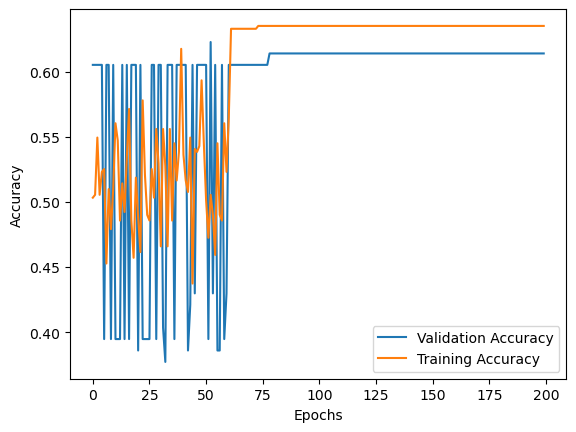

In [34]:
model = build_model(best_hps)

# Train the model on the full dataset
history = model.fit(X_train, Y_train, epochs=200, validation_data=(X_test, Y_test))

# Make predictions on new data
y_pred = model.predict(X_test)

# Plot validation and test accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Visualizing accuracy and loss

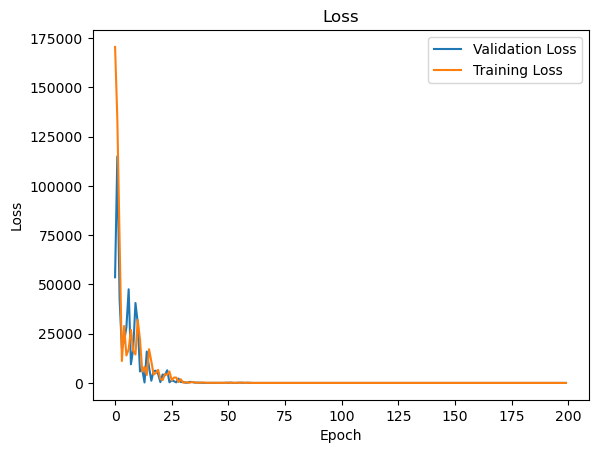

In [35]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Accuracy of the model on test data

In [36]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.6762 - accuracy: 0.6053
0.6052631735801697


In [37]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 31)
[-0.23949961 -0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457
 -0.11323672  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124
  2.62763999  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593
  2.88971815 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552
 -0.38767294  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515
 -0.6268286 ]


In [38]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 3ms/step


In [39]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 1)
[0.36193618]


In [40]:
print(X_test_std)

[[-0.23949961 -0.04462793 -1.41612656 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [-0.2467237   0.24583601 -0.06219797 ...  0.54129749  0.11047691
   0.0483572 ]
 [-0.17438876 -1.26115925 -0.29051645 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [-0.24002111  0.72709489  0.45836817 ...  1.46701686  1.19909344
   0.65319961]
 [-0.2400006   0.25437907  1.33054477 ... -1.29043534 -2.22561725
  -1.59557344]
 [-0.23978737  0.84100232 -0.06676434 ...  2.15137705  0.35629355
   0.37459546]]


In [41]:
print(Y_pred)

[[0.36193618]
 [0.36410174]
 [0.3685827 ]
 [0.35953715]
 [0.36357725]
 [0.36662993]
 [0.36556646]
 [0.37138838]
 [0.3671325 ]
 [0.3738893 ]
 [0.36344865]
 [0.3626679 ]
 [0.35972464]
 [0.36479   ]
 [0.36724997]
 [0.36583686]
 [0.3690993 ]
 [0.3661182 ]
 [0.36924642]
 [0.36331695]
 [0.3671985 ]
 [0.36810365]
 [0.37201977]
 [0.37267816]
 [0.3649246 ]
 [0.36446285]
 [0.36678323]
 [0.3667958 ]
 [0.36607042]
 [0.36716047]
 [0.3779622 ]
 [0.36713997]
 [0.37056178]
 [0.36949855]
 [0.363961  ]
 [0.3642725 ]
 [0.3760206 ]
 [0.3671289 ]
 [0.3668813 ]
 [0.3649606 ]
 [0.36089888]
 [0.36291447]
 [0.36647958]
 [0.36331454]
 [0.36469418]
 [0.36440396]
 [0.3653995 ]
 [0.36483642]
 [0.3703972 ]
 [0.36244264]
 [0.37942925]
 [0.36451933]
 [0.36293322]
 [0.36834833]
 [0.36614385]
 [0.36468783]
 [0.36521915]
 [0.36545366]
 [0.35832053]
 [0.36464846]
 [0.36407086]
 [0.36840615]
 [0.3689717 ]
 [0.3603515 ]
 [0.3637201 ]
 [0.36699563]
 [0.36271805]
 [0.36499575]
 [0.37064376]
 [0.36745325]
 [0.36505485]
 [0.36

model.predict() gives the prediction probability of each class for that data point

In [42]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [43]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


**Building the predictive system**

In [44]:
input_data = (11.76,21.6,21.7,4.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 41ms/step
[[0.3666524]]
[0]
The tumor is Malignant


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
